In [59]:
import math
import numpy as np
import matplotlib.pyplot as plt

import scipy
import random as rn
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 1. Решите линейную систему

In [5]:
A = np.array([
    [1, 2, 3],
    [4, 0, 6],
    [7, 8, 9],
])

B = np.array([12, 2, 1])

np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

### 2. Найдите псевдорешение

```
x + 2y – z = 1
3x – 4y = 7
8x – 5y + 2z = 12 
2x – 5z = 7
11x +4y – 7z = 15
```

In [16]:
A = np.array([
    [1, 2, -1],
    [3, -4, 0],
    [8, -5, 2],
    [2, 0, -5],
    [11, 4, -7],
])

B = np.array([1, 7, 12, 7, 15])

np.linalg.lstsq(A, B, rcond=None)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

### 3. Сколько решений имеет линейная система:
  Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [58]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

B = np.array([[12, 2, 1]])

C = np.concatenate((A, B.T), axis=1)

rA = np.linalg.matrix_rank(A, 0.00001)
rC = np.linalg.matrix_rank(C, 0.00001)

if rA < rC:
    print(f'{rA} < {rC} => Не имеет решений')
    
    print('Если B = [1,1,1] то')
    B = np.array([[1, 1, 1]])
    C = np.concatenate((A, B.T), axis=1)
    rA = np.linalg.matrix_rank(A, 0.00001)
    rC = np.linalg.matrix_rank(C, 0.00001)
    
    x, y, z = np.linalg.solve(A, B[0])
    print(f'{rA} = {rC} => Имеет решение: {x:.2f}, {y:.2f}, {z:.2f}')

2 < 3 => Не имеет решений
Если B = [1,1,1] то
2 = 2 => Имеет решение: 0.20, -1.40, 1.20


### 4. Вычислите LU-разложение матрицы:
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [94]:
A = np.array([
    [1, 2, 3],
    [2, 16, 21],
    [4, 28, 73],
])


P, L, U = scipy.linalg.lu(A)
print(P, L, U, sep='\n')

B = np.array([2, 4, 3])

y = np.linalg.solve(L, B)
x = np.linalg.solve(U, y)
x

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


array([ 4.91203704, -0.21990741, -0.15740741])

### 5. Найдите нормальное псевдорешение недоопределенной системы:
```
x + 2y – z = 1
8x – 5y + 2z = 12
```

Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

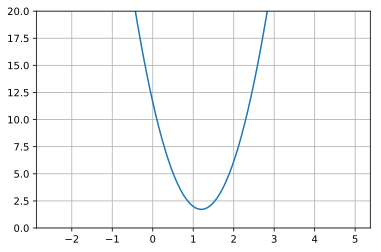

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

In [108]:
def Q(x, y, z):
    return x**2 + y**2 + z**2

x = np.linspace(-2.5, 5, 100)
y = (6*x - 10) / 9
z = 1 - 2*y - x
plt.plot(x, Q(x, y, z))
plt.ylim([0,20])
plt.grid(True)
plt.show()

A = np.array([
    [1, 2, -1],
    [8, -5, 2],
])

B = np.array([1, 12])

np.linalg.lstsq(A, B, rcond=None)

### 6. Найдите одно из псевдорешений вырожденной системы:
Попробуйте также отыскать и нормальное псевдорешение.

In [120]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

B = np.array([2, 5, 11])

Q, R = np.linalg.qr(A)

R1 = R[:2, :2]
B1 = np.dot(np.transpose(Q), B)[:2]
X1 = np.linalg.solve(R1, B1)
X = np.append(X1, 0)
print(X)
np.linalg.norm(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


1.4999999999999893

In [122]:
np.linalg.norm(np.dot(A, X) - B)

1.2247448713915885

In [124]:
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 3.33475287e-16]))

In [125]:
X = np.array([1.25,  0.5 , -0.25])
np.linalg.norm(np.dot(A, X) - B)

1.224744871391589